# Problem Statement: Customer Segmentation Using Machine Learning
Description: Customer segmentation is the process of dividing a customer base into groups of individuals
that are similar in specific ways relevant to marketing, such as age, gender, interests, and behaviors. By
using machine learning algorithms, businesses can gain valuable insights into customer behavior, identify
patterns and trends, and develop targeted marketing strategies.

### K SAINATH DORA BABU, ABHISHEK KUMAR PANDEY, R KOUSHIK, ANSH BAMOTHRA, B SHASHANK
(DS-Alpha, 1st year)

In [1]:
import pandas as pd, numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
customer_data = pd.read_csv('data.csv', encoding_errors='ignore')

In [3]:
customer_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
#checking whether stockCode is repatitive
x = set(customer_data['StockCode'])
print(len(x))
#checking invoice
print(len(customer_data['InvoiceNo']))

4070
541909


In [5]:
head = customer_data.head()
head

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# pd.crosstab(customer_data['StockCode'], customer_data['Description']).head()

In [7]:
# pd.crosstab(customer_data['CustomerID'], customer_data['Description'])

In [8]:
unique_customers = len(customer_data['CustomerID'].unique())
print('Unique customers are: ', unique_customers)
unique_Products = len(customer_data['Description'].unique())

print('Unique products are: ', unique_Products)

Unique customers are:  4373
Unique products are:  4224


In [9]:
#removing all negative quantity(quantity cant be negative)
drop_index = [customer_data.index[i] for i in customer_data[customer_data['Quantity']<0].index]
customer_data.drop(drop_index, inplace=True)

In [10]:
#getting all the countries data
all_countries= customer_data['Country'].unique()
print(len(all_countries))
all_countries

38


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [11]:
#adding countries and their details as dict key value pairs
c = {}
v = []
for i in all_countries:
    c[i] = 0
for i in all_countries:
    v.append(customer_data[customer_data['Country'] == i].reset_index(drop=True))
for i, j in enumerate(v):
    c[list(c)[i]] = j

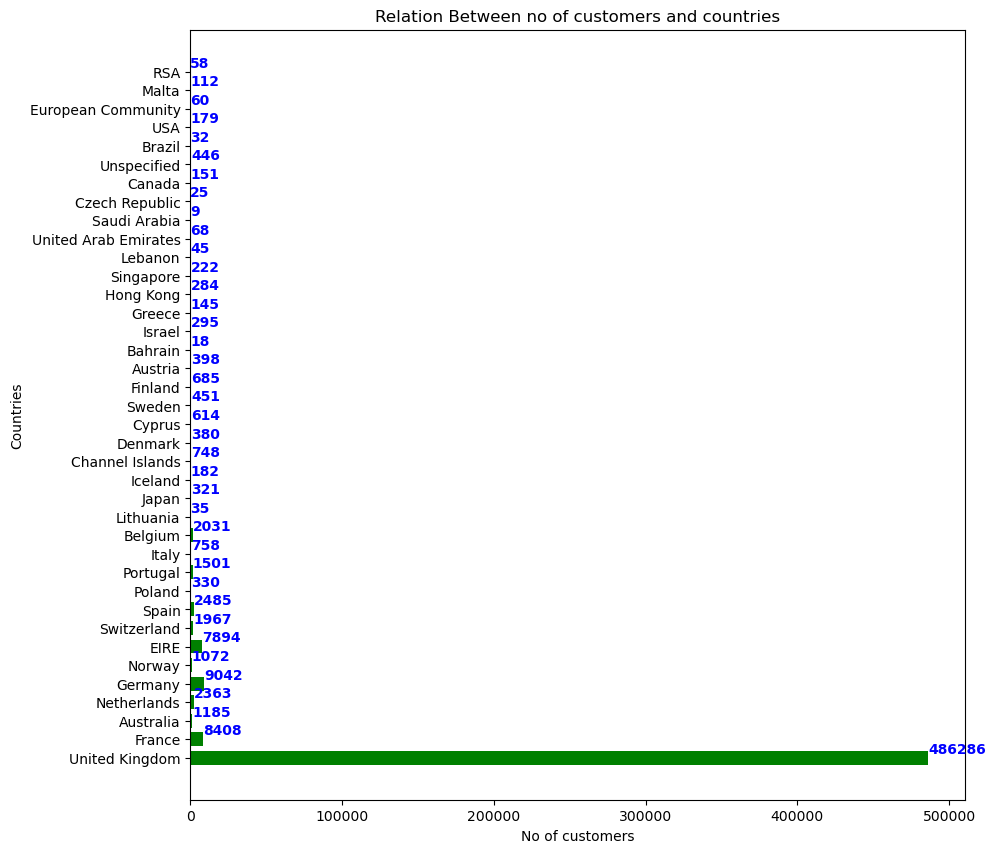

<Figure size 10000x10000 with 0 Axes>

In [12]:
#population barchart
exp_values = [len(i) for i in v]

fig, ax = plt.subplots(figsize=(10, 10))
width = 0.75
fig = plt.figure(figsize = (100, 100))
ax.set(title="Relation Between no of customers and countries", xlabel='No of customers', ylabel='Countries')
ax.barh(all_countries, exp_values, width,  color = "green")
 
for i, v in enumerate(exp_values):
    ax.text(v + 3, i + .25, str(v),
            color = 'blue', fontweight = 'bold')
plt.show()

In [13]:
customer_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


## finding mostly brought product

In [14]:
from statistics import mode
mostly_purchased_products = mode(customer_data['Description'])
print(mostly_purchased_products)
print(f"Mostly purchased item in the list is: WHITE HANGING HEART T-LIGHT HOLDER")

WHITE HANGING HEART T-LIGHT HOLDER
Mostly purchased item in the list is: WHITE HANGING HEART T-LIGHT HOLDER


## finding out mostly used products from individual countries

In [15]:
customer_data[customer_data['Country']=='France']
mostly_used = []
for i in c:
    product = mode(c[i]['Description'])
    mostly_used.append(product)
print(mostly_used)
print('\n')
print(c.keys())

['WHITE HANGING HEART T-LIGHT HOLDER', 'POSTAGE', 'SET OF 3 CAKE TINS PANTRY DESIGN ', 'POSTAGE', 'POSTAGE', 'POSTAGE', 'CARRIAGE', 'POSTAGE', 'POSTAGE', 'LARGE CHINESE STYLE SCISSOR', 'POSTAGE', 'POSTAGE', 'POSTAGE', 'RED  HARMONICA IN BOX ', 'RED SPOTTY BISCUIT TIN', 'AIRLINE BAG VINTAGE JET SET BROWN', 'DOORMAT HOME SWEET HOME BLUE ', 'POSTAGE', 'REGENCY CAKESTAND 3 TIER', 'POSTAGE', 'POSTAGE', 'POSTAGE', 'OCEAN SCENT CANDLE IN JEWELLED BOX', 'WOODLAND CHARLOTTE BAG', 'POSTAGE', 'MEASURING TAPE BABUSHKA PINK', 'Manual', 'LAUNDRY 15C METAL SIGN', 'RETROSPOT HEART HOT WATER BOTTLE', 'ASSORTED BOTTLE TOP  MAGNETS ', 'BAKING MOULD HEART MILK CHOCOLATE', 'COLOURING PENCILS BROWN TUBE', '3 STRIPEY MICE FELTCRAFT', 'REGENCY CAKESTAND 3 TIER', 'SET OF 36 TEATIME PAPER DOILIES', 'POSTAGE', 'GRAND CHOCOLATECANDLE', 'RED RETROSPOT CUP']


dict_keys(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgi

In [16]:
mostly_used_products_country_wise = pd.DataFrame({
    'Country':c.keys(),
    'Mostly Purchased Products': mostly_used
})
mostly_used_products_country_wise

,Country,Mostly Purchased Products
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,France,POSTAGE
2,Australia,SET OF 3 CAKE TINS PANTRY DESIGN
3,Netherlands,POSTAGE
4,Germany,POSTAGE
5,Norway,POSTAGE
6,EIRE,CARRIAGE
7,Switzerland,POSTAGE
8,Spain,POSTAGE
9,Poland,LARGE CHINESE STYLE SCISSOR


In [17]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [18]:
customer_data.drop(columns='StockCode', inplace = True)
customer_data

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [19]:
customer_data['AmtSpent'] = customer_data['UnitPrice']*customer_data['Quantity']
customer_data.head(8)


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmtSpent
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10


## Finding out the right number of clusters for Kmeans

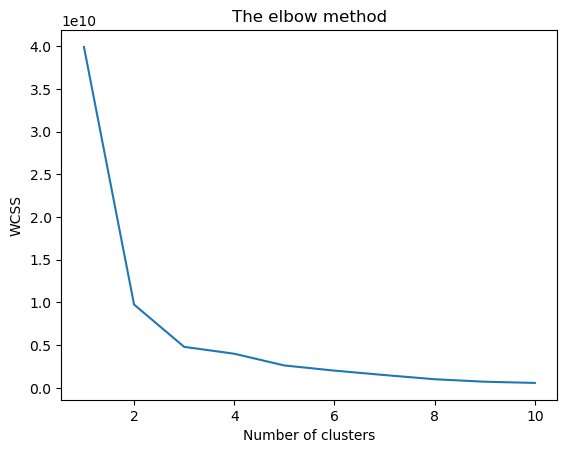

In [20]:

from sklearn.cluster import KMeans
wcss = []
X = customer_data.iloc[:, [4, -1]]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 0 0 ... 0 0 0]


## Visualization

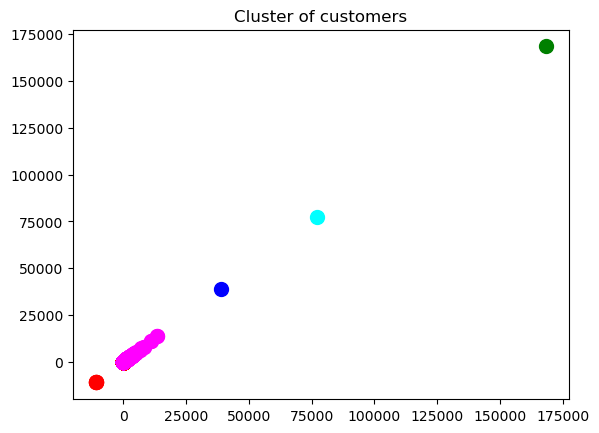

In [28]:
plt.scatter(X[y_kmeans==0], X[y_kmeans==0], s=100, c='red', label='cluster-1')
plt.scatter(X[y_kmeans==1], X[y_kmeans==1], s=100, c='blue', label='cluster-2')
plt.scatter(X[y_kmeans==2], X[y_kmeans==2], s=100, c='green', label='cluster-3')
plt.scatter(X[y_kmeans==3], X[y_kmeans==3], s=100, c='cyan', label='cluster-4')
plt.scatter(X[y_kmeans==4], X[y_kmeans==4], s=100, c='magenta', label='cluster-5')
plt.title('Cluster of customers')
plt.show()